# 大作业


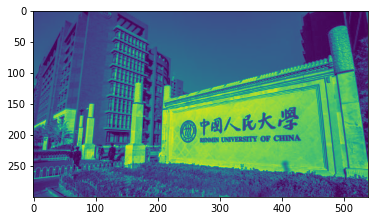

In [20]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#输入图像
im = np.array(Image.open('ruc.jpg').convert('L'))
plt.imshow(im)
plt.show()
# im是输入图像转换成的list
im = im.tolist()

# ker是卷积核对应的list
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])

ker = ker.tolist()

In [21]:
def conv2d(im, kernel, stride =1):    
    # 请完成本函数代码
    
    ker=kernel
    #UnboundLocalError: local variable 'ker' referenced before assignment
    #solution:把欲用的global variance(即ker) 在local context内重新赋值——ker=kernel
    
    h=len(ker)
    #h为K(卷积核)矩阵的行数（列表长度）；
    w=len(ker[0])
    #w为K（卷积核）矩阵的列数(列表中每个元素的长度)
    im_out=[]
    new_ker=np.zeros((w,h))
    for i in range(h):#1.翻转核矩阵
        for j in range(w):
            new_ker[i][j]=ker[h-i-1][w-j-1]
    #K′[i][j]=K[h−i−1][w−j−1]
    ker=new_ker
    #——————核矩阵翻转完成——————
    
    h=len(ker)
    w=len(ker[0])
    #h为K`(翻转卷积核)矩阵的行数（列表长度）；
    #w为K`（翻转后卷积核）矩阵的列数(列表中每个元素的长度)
    H=len(im)
    W=len(im[0])
    #H为im矩阵的行数
    #W为im矩阵的列数

    h1=int((H-h)/stride)+1
    w1=int((W-w)/stride)+1
    #计算im_out的行数h1和列数w1
    #h1=floor((H-h)/垂直方向步长)+1 行
    #w1=floor((W-w)/水平方向步长)+1 列
    
    unit=0
    im_out=np.zeros((h1,w1))
    #构造h1行w1i列的m_out零矩阵，以便于承接卷积后（i，j）的值
    for i in [i*stride for i in range(h1)]:
        #卷积核要沿着每一列卷积h1次，
        io= int(i/stride)
        for j in [j*stride for j in range(w1)]:
        #卷积核要沿着每一行运算w1次
        #从左上角开始，在图像上从左到右、从上到下滑动：每次向右滑动移动的步长为stride
            jo=int(j/stride)
            
            for u in range(h):
                for v in range(w):
                    unit+=im[i+u][j+v]*ker[u][v]
                    #将K′和其覆盖的im的对应位置的元素相乘并求和，作为这个位置的响应值，即unit
                    
            im_out[io][jo]=unit
            #把响应值存入im_out对应位置（i，j）
            unit=0
            #清空上个位置的响应值unit
    return im_out

296
536


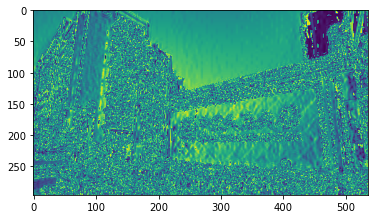

In [22]:
# 用ker铺im的处理结果，更改这行参数
im_out = conv2d(im,ker,1)

#显示处理后的图像
print(len(im_out))
print(len(im_out[0]))
im_out = np.array(im_out)
im1 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im1)
plt.show()



[[0.04, 0.04, 0.04, -0.04, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.04, 0.04, -0.04, -0.04]]


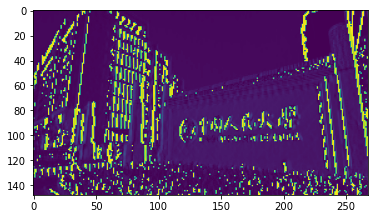

In [23]:
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])
ker2 = ker/25
ker2 = ker2.tolist()
print(ker2)

# 用ker2铺im的处理结果
im_out = conv2d(im,ker2,2)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

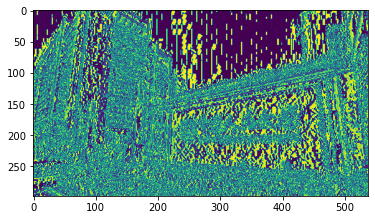

In [24]:
k3 =[[1, 0, -1], 
     [2, 0, -2], 
    [1, 0, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

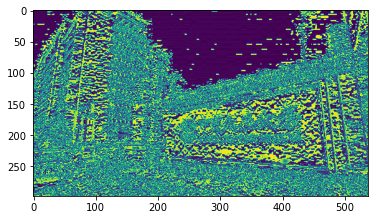

In [25]:
k3 =[[1, 2, 1], 
     [0, 0, 0], 
    [-1, -2, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

In [26]:
im = [[ 8, -1, -8,  2,  3, -9, -2,  5,  5,  5, -8],
       [ 8,  2, -8, -4,  1,  7,  6, -7,  8, -4, -6],
       [ 5,  7, -1,  2,  1, -7, -4,  1, -1,  1,  0],
       [-3,  0, -2, -2, -5, -4, -7,  5,  0, -3, -1],
       [-5,  0,  3,  1, -1,  4,  8, -2, -3, -8,  5],
       [-2, -7, -6, -3, -3, -3,  2,  5, -7,  7,  3],
       [ 8, -9, -3,  3,  0, -4, -6, -8,  6, -8, -7],
       [-6,  0,  0,  8,  3, -6,  1,  8, -2,  2,  7],
       [-4, -8,  6, -3, -9,  2, -5, -4, -9,  0, -5],
       [-6,  4, -1,  0, -4,  7,  4,  5,  0, -4, -6],
       [ 6,  4,  2, -4,  7,  4,  8, -5, -1, -7, -5]]

K = [[ 5, -3,  3,  5,  7],
       [ 0, -9,  8, -8, -8],
       [ 6,  6,  1, -5,  3],
       [-3, -9,  5,  0,  1],
       [ 1, -9, -6,  0,  8]]

print(conv2d(im, K))
#print(conv2d(im, K, 2))

[[  87.  -26.  -86.  134.   99.  -71.  118.]
 [  57.  -80. -238. -198.   24.   11.  -46.]
 [  81.   97.  201.  162.  -73. -147. -249.]
 [-102.  130.   77.  164.   35.  -69.  356.]
 [ -90.   27.  -99. -430. -197.  251. -221.]
 [ 184.  137. -151.  270.   68.   64.  165.]
 [  53. -125.   34.   45.    2.  -54. -113.]]


In [19]:
print(conv2d(im, K, 2))

[[  87.  -86.   99.  118.]
 [  81.  201.  -73. -249.]
 [ -90.  -99. -197. -221.]
 [  53.   34.    2. -113.]]


In [16]:
im = [[1, 1, 0, 0],
             [1, 1, 0, 0],
             [0, 0, 1, 1],
             [0, 0, 1, 1]]
K = [[1, 1],
      [1, 1]]
print(conv2d(im, K, 2))

[[4. 0.]
 [0. 4.]]
